In [1]:
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import numpy as np
from scipy import stats
from bocp import BOCD, Gaussian, Poisson
np.random.seed(42)

# Gaussian

In [2]:
data  = []
cp = []
mean = 0
var = 1
for t in range(0, 300):

    if np.random.random() < 1/100:
        if mean == 0:            
            mean = 3
            var = 2
        else:
            mean = 0
            var = 1
        cp.append(t)

    data.append(np.random.normal(mean, var))

Change point 89 found at t=91


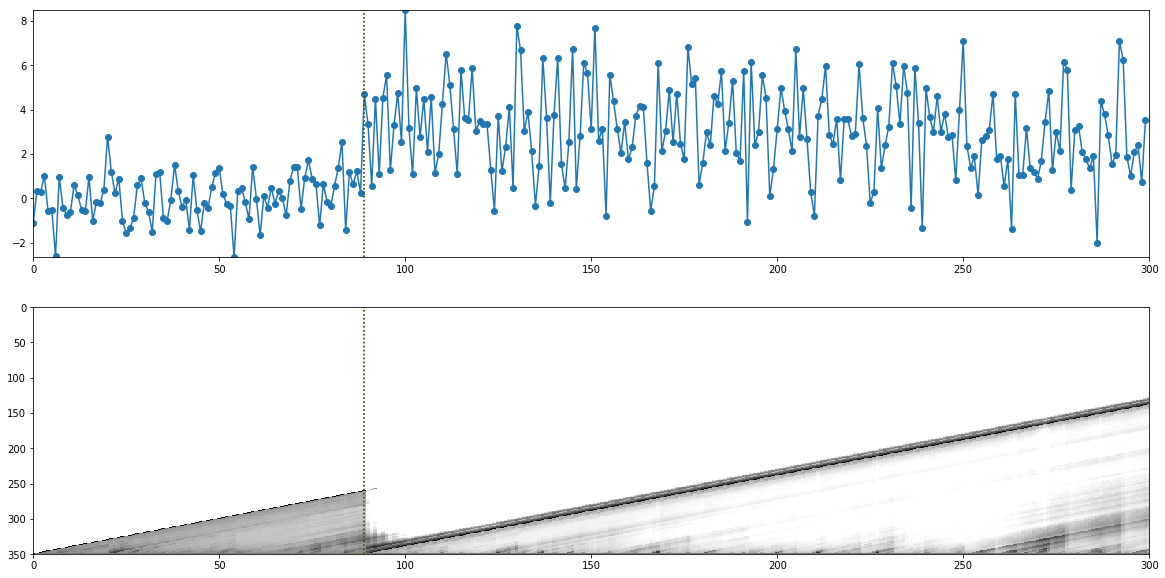

In [3]:
model     = Gaussian()
detector = BOCD(model, 1/100)
for x in data:
    detector.update(x)
ax1,ax2 = detector.plot(data)

# plot true change point
for x in cp:
    ax1.axvline(x, c='green', ls='dotted')
    ax2.axvline(x, c='green', ls='dotted')

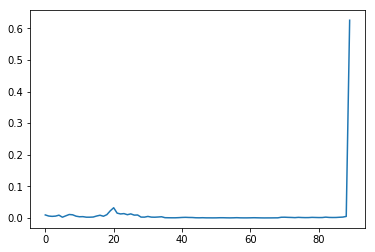

In [4]:
plt.plot(detector.dist_t(89))

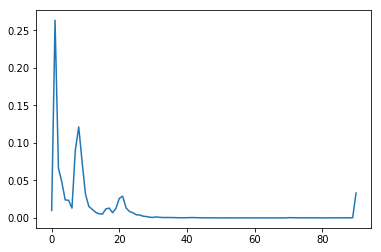

In [5]:
plt.plot(detector.dist_t(90))

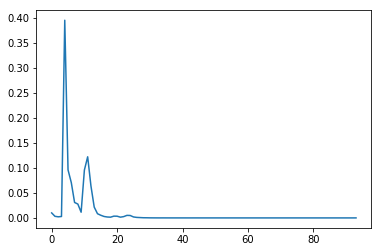

In [6]:
plt.plot(detector.dist_t(93))

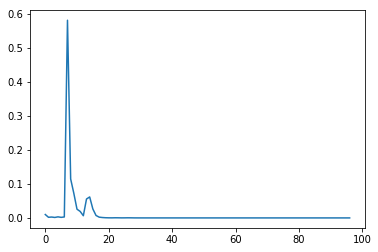

In [7]:
plt.plot(detector.dist_t(96))

# Poisson

In [8]:
data  = []
cp = []
mu= 1
for t in range(0, 300):
    if np.random.random() < 1/80:
        if mu == 1:
            mu = 4
        else:
            mu = 1
        cp.append(t)
    data.append(np.random.poisson(mu))

Change point 87 found at t=89
Change point 88 found at t=120
Change point 141 found at t=142
Change point 244 found at t=250
Change point 298 found at t=300


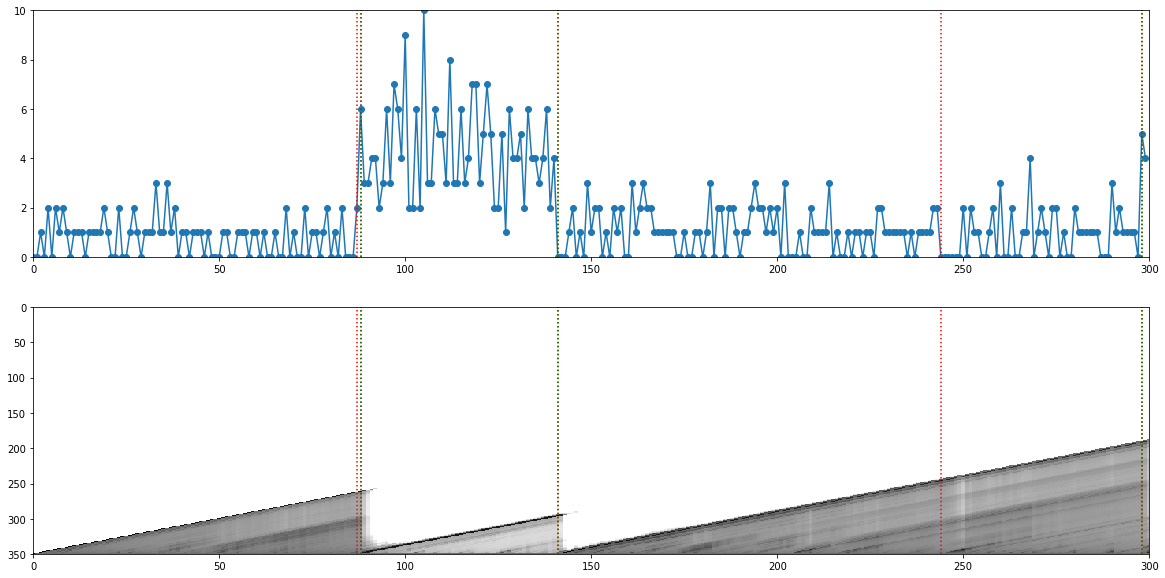

In [9]:
model     = Poisson()
detector2 = BOCD(model, 1/50)

for x in data:
    detector2.update(x)
    
ax1,ax2 = detector2.plot(data)

# plot true change point
for x in cp:
    ax1.axvline(x, c='green', ls='dotted')
    ax2.axvline(x, c='green', ls='dotted')

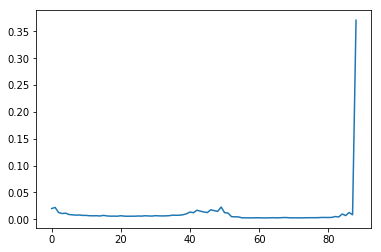

In [10]:
plt.plot(detector2.dist_t(88))

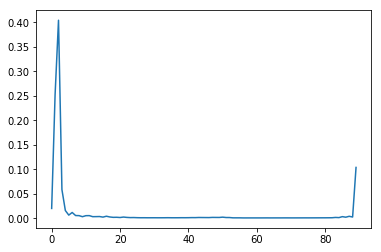

In [11]:
plt.plot(detector2.dist_t(89))

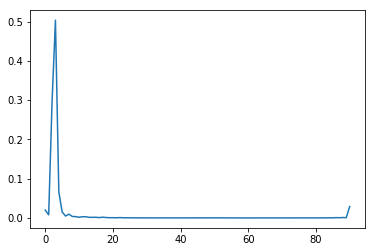

In [12]:
plt.plot(detector2.dist_t(90))